In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy.stats import chi2_contingency

In [106]:
# Read the data
df = pd.read_csv('Questionnarie_Clean_Manually.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 12 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   gender                                                                                                            727 non-null    object
 1   co_city                                                                                                           727 non-null    object
 2   Industry                                                                                                          727 non-null    object
 3   ifdisc                                                                                                            727 non-null    object
 4   DiscTypesMeet                         

(0.0, 370.0)

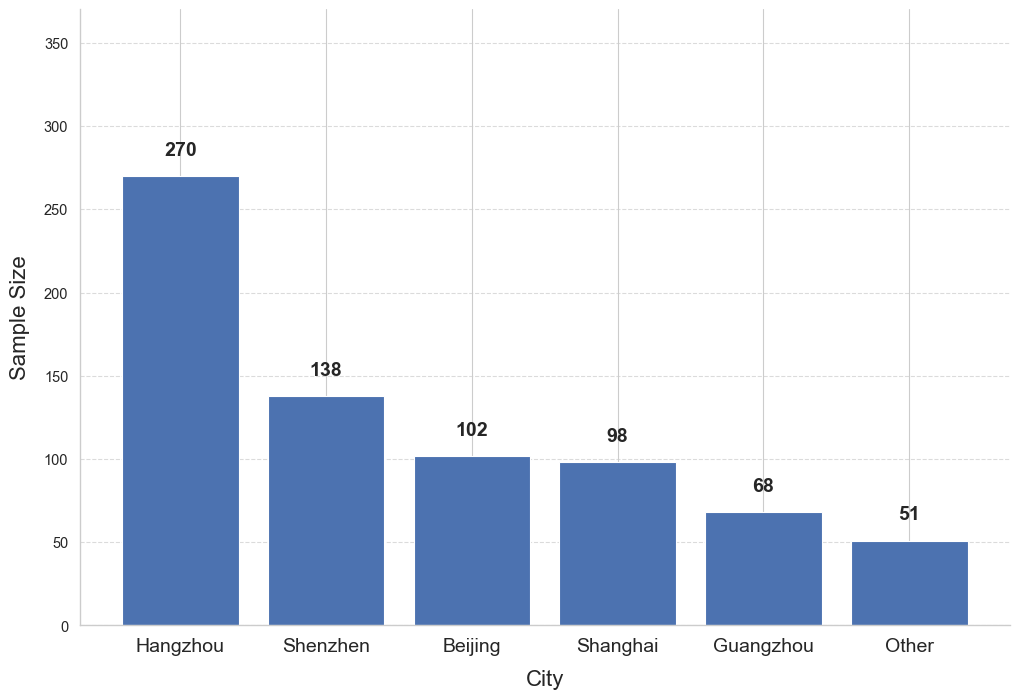

In [107]:
# Clean the column names
df.columns = df.columns.str.lower().str.strip()

# Convert the city column to category type
df['co_city'] = df['co_city'].astype('category')

# Compute the sample size for each city
city_counts = df['co_city'].value_counts()

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(city_counts.index, city_counts.values, color='#4C72B0')

# Add gridlines to the plot
ax.grid(axis='y', linestyle='--', alpha=0.7)


# Add labels and title to the plot
ax.set_xlabel('City', fontsize=16, labelpad=10)
ax.set_ylabel('Sample Size', fontsize=16, labelpad=10)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=14)

# Add text labels to the bars
for i, v in enumerate(city_counts.values):
    ax.text(i, v+10, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Remove the top and right spines of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the y-axis limits to improve readability
plt.ylim([0, max(city_counts.values) + 100])

In [108]:
# Finance Industry, count the number of occurrences of each discrimination category
filtered_df = df[(df['ifdisc'] == 'Yes') & (df['industry'] == 'Finance')]
counts = filtered_df['finance_type'].str.split(',').explode().str.strip().value_counts()
new_df=filtered_df[filtered_df['finance_type']=='C']
counts2 = new_df['disctypesmeet'].str.split(',').explode().str.strip().value_counts()
print(counts)
print(counts2)

finance_type
B    61
A    54
C    36
D     3
Name: count, dtype: int64
disctypesmeet
Education    23
Age          21
Gender       18
Health        9
Name: count, dtype: int64


In [109]:
filtered_df = df[(df['ifdisc'] == 'Yes') & (df['industry'] == 'Internet')]
counts = filtered_df['internet_type'].str.split(',').explode().str.strip().value_counts()
new_df=filtered_df[filtered_df['internet_type']=='A']
counts2 = new_df['disctypesmeet'].str.split(',').explode().str.strip().value_counts()
print(counts)
print(counts2)

internet_type
C    43
A    40
E    38
F    31
D    25
B    21
G     5
Name: count, dtype: int64
disctypesmeet
Age          24
Education    23
Gender       20
Health        9
Name: count, dtype: int64


In [110]:
# Split the 'DiscTypesMeet' column into separate types of discrimination
discrimination_types = ['Gender', 'Age', 'Education', 'Health']
for disc_type in discrimination_types:
    df[disc_type] = df['disctypesmeet'].str.contains(disc_type, regex=False)

# Calculate the count of individuals who experienced discrimination based on gender, industry, and each discrimination type
gender_industry_discrimination_counts = df.groupby(['industry', 'gender'])[discrimination_types].sum().reset_index()

# Calculate the count of each type of discrimination across all industries and genders
discrimination_counts = df[discrimination_types].sum().reset_index()
discrimination_counts.columns = ['Discrimination Type', 'count']

# Calculate the count of discrimination for each row
gender_industry_discrimination_counts['Total Discrimination'] = gender_industry_discrimination_counts[discrimination_types].sum(axis=1)

# Print the updated DataFrame
print(gender_industry_discrimination_counts)


   industry  gender Gender Age Education Health Total Discrimination
0   Finance  female     44  40        52     15                  151
1   Finance    male     35  45        52     22                  154
2  Internet  female     45  55        47     17                  164
3  Internet    male     57  61        69     22                  209


In [111]:
# Calculate the total discrimination count for each gender and industry combination
gender_industry_discrimination_counts['Total Discrimination'] = gender_industry_discrimination_counts[discrimination_types].sum(axis=1)

# Calculate the percentages
gender_industry_discrimination_counts['Gender'] = (gender_industry_discrimination_counts['Gender'] / gender_industry_discrimination_counts['Total Discrimination']) * 100
gender_industry_discrimination_counts['Age'] = (gender_industry_discrimination_counts['Age'] / gender_industry_discrimination_counts['Total Discrimination']) * 100
gender_industry_discrimination_counts['Education'] = (gender_industry_discrimination_counts['Education'] / gender_industry_discrimination_counts['Total Discrimination']) * 100
gender_industry_discrimination_counts['Health'] = (gender_industry_discrimination_counts['Health'] / gender_industry_discrimination_counts['Total Discrimination']) * 100

# Round the percentages to two decimal places
gender_industry_discrimination_counts = gender_industry_discrimination_counts.round(2)

# Print the updated DataFrame
print(gender_industry_discrimination_counts)


   industry  gender     Gender        Age  Education     Health   
0   Finance  female  29.139073  26.490066  34.437086   9.933775  \
1   Finance    male  22.727273  29.220779  33.766234  14.285714   
2  Internet  female  27.439024  33.536585  28.658537  10.365854   
3  Internet    male  27.272727  29.186603  33.014354  10.526316   

  Total Discrimination  
0                  151  
1                  154  
2                  164  
3                  209  


In [112]:
filtered_df = df[(df['ifdisc'] == 'Yes') & (df['industry'] == 'Internet')]
counts = filtered_df['internet_type'].str.split(',').explode().str.strip().value_counts()

percentages = {}

for internet_type in ['A', 'B', 'C', 'D', 'E', 'F']:
    new_df = filtered_df[filtered_df['internet_type'] == internet_type]
    counts2 = new_df['disctypesmeet'].str.split(',').explode().str.strip().value_counts()
    percentages[internet_type] = round((counts2 / counts.loc[internet_type]) * 100,2)

percentages_df = pd.DataFrame(percentages)
percentages_df = percentages_df.reindex(['Age', 'Education', 'Gender', 'Health'])
print(percentages_df)


                  A      B      C     D      E      F
disctypesmeet                                        
Age            60.0  66.67  48.84  64.0  50.00  67.74
Education      57.5  52.38  69.77  32.0  50.00  67.74
Gender         50.0  57.14  53.49  40.0  52.63  45.16
Health         22.5  19.05  13.95  24.0  23.68  12.90


In [113]:
filtered_df = df[(df['ifdisc'] == 'Yes') & (df['industry'] == 'Finance')]
counts = filtered_df['finance_type'].str.split(',').explode().str.strip().value_counts()

percentages = {}

for internet_type in ['A', 'B', 'C']:
    new_df = filtered_df[filtered_df['finance_type'] == internet_type]
    counts2 = new_df['disctypesmeet'].str.split(',').explode().str.strip().value_counts()
    percentages[internet_type] = round((counts2 / counts.loc[internet_type]) * 100,2)

percentages_df = pd.DataFrame(percentages)
percentages_df = percentages_df.reindex(['Age', 'Education', 'Gender', 'Health'])
print(percentages_df)


                   A      B      C
disctypesmeet                     
Age            51.85  57.38  58.33
Education      68.52  68.85  63.89
Gender         53.70  49.18  50.00
Health         31.48  16.39  25.00


In [114]:
with open('/Users/apple/Desktop/master_thesis/Data Clean & Analyze/split.csv', 'r') as f:
 text = f.readlines()

words_list = [set(line.strip().replace('[', '').replace(']', '').replace("'", '').split(', ')) for line in text]
for i in range(len(words_list)):
 words_list[i] = {re.sub(r'"', '', word) for word in words_list[i]}

combination_counts = {}
found_combinations = False

for d in words_list:
    d_cleaned = {key.strip() for key in d}
    for combination in combinations(d_cleaned, 2):
        key1, key2 = sorted(combination)  # Sort the combination to ignore the order
        if key1 in {'Age', 'Gender', 'Health', 'Education'} and key2 in {'Age', 'Gender', 'Health', 'Education'} and key1 != key2:
            found_combinations = True
            combination_str = f"Combination: {key1}, {key2}"
            combination_counts[combination_str] = combination_counts.get(combination_str, 0) + 1

if not found_combinations:
    print("No combinations found")
else:
    sorted_combinations = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)
    for combination, count in sorted_combinations:
        print(combination)
        print(f"Count: {count}")



Combination: Education, Gender
Count: 108
Combination: Age, Education
Count: 108
Combination: Age, Gender
Count: 78
Combination: Age, Health
Count: 48
Combination: Education, Health
Count: 43
Combination: Gender, Health
Count: 41


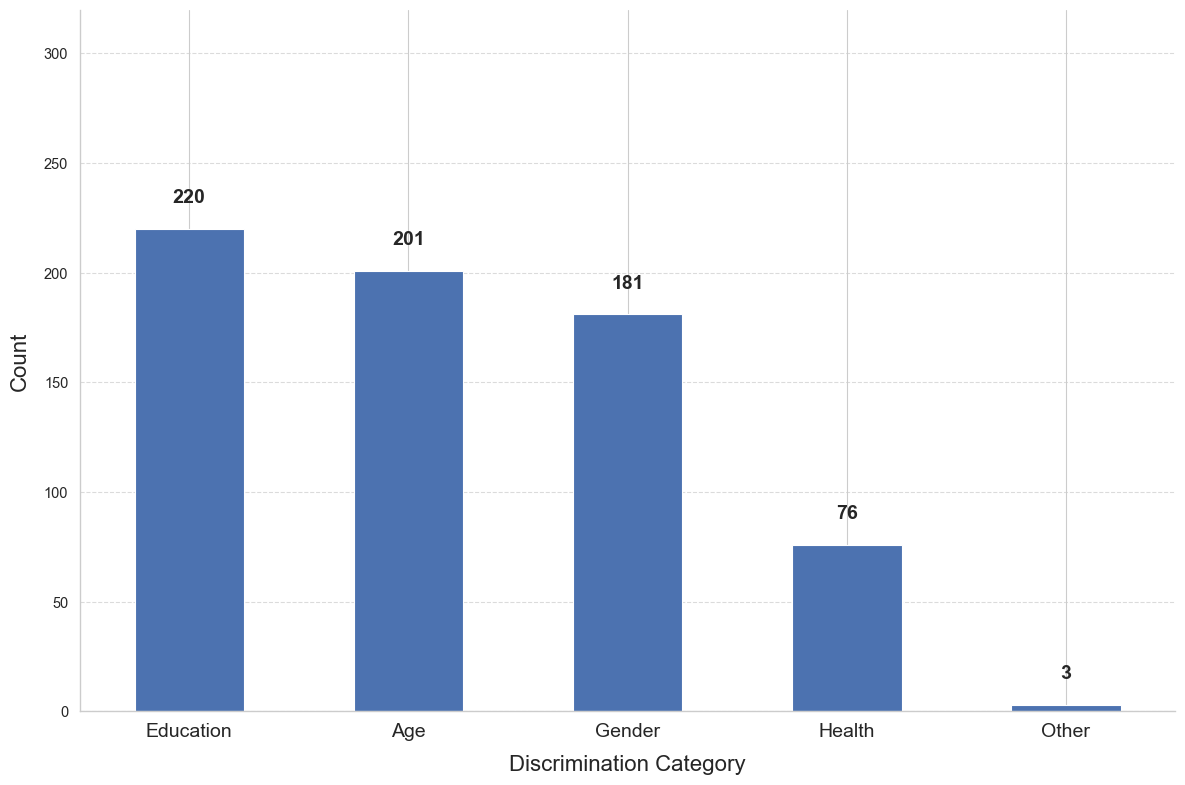

In [115]:
# count the number of occurrences of each discrimination category
counts = df['disctypesmeet'].str.split(',').explode().str.strip().value_counts()

# create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', ax=ax, color='#4C72B0')

# Add gridlines to the plot
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title to the plot
ax.set_xlabel('Discrimination Category', fontsize=16, labelpad=10)
ax.set_ylabel('Count', fontsize=16, labelpad=10)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=14)

# Add text labels to the bars
for i, v in enumerate(counts.values):
    ax.text(i, v+10, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

# Remove the top and right spines of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the y-axis limits to improve readability
plt.ylim([0, max(counts.values) + 100])

# Adjust the plot style
plt.tight_layout()

# Show the plot
plt.show()

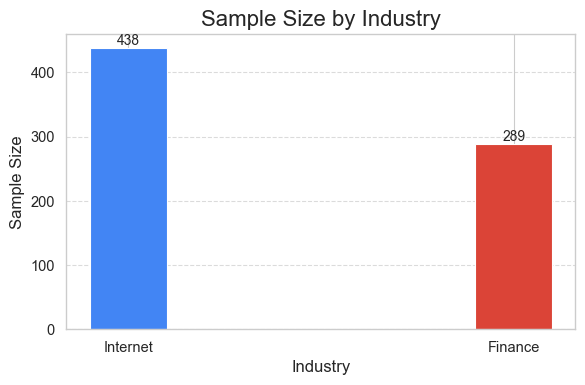

In [116]:
df['industry'] = df['industry'].astype('category')
industry_counts = df['industry'].value_counts()
colors = ['#4285F4', '#DB4437']
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(industry_counts.index, industry_counts.values, color=colors, width=0.2)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xlabel('Industry', fontsize=12)
ax.set_ylabel('Sample Size', fontsize=12)
ax.set_title('Sample Size by Industry', fontsize=16)
for i, v in enumerate(industry_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

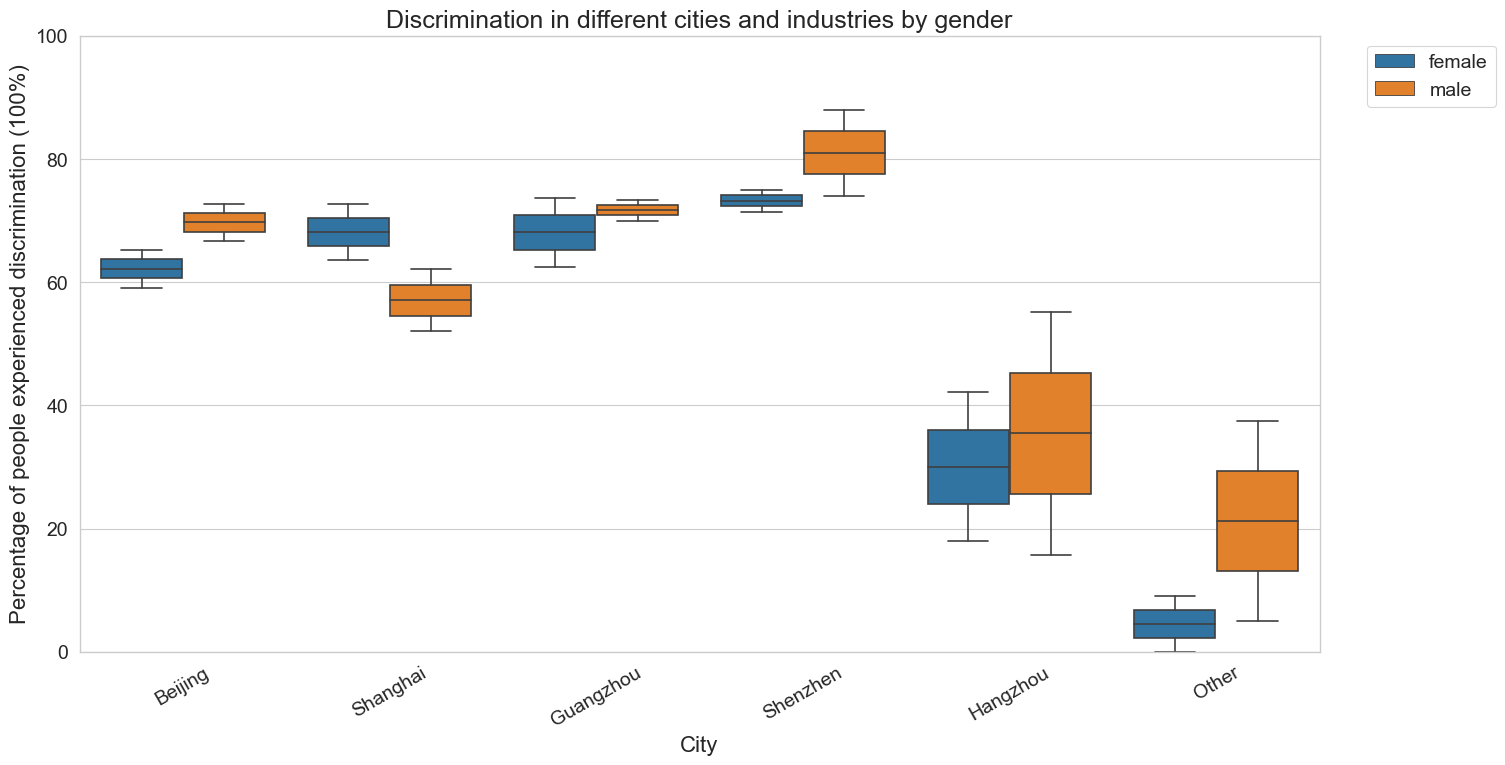

In [117]:
df = pd.read_csv('Questionnarie_Clean_Manually.csv')
df.columns = df.columns.str.lower().str.strip()

# transfer the gender column to category type
df['gender'] = df['gender'].astype('category')
df['co_city'] = df['co_city'].astype('category')
df['industry'] = df['industry'].astype('category')

# Create a new data frame, only contains fields such as gender, co_city,industry and if_disc
df2 = df[['gender', 'co_city', 'industry', 'ifdisc']]

# Calculate how many people experienced recruitment discrimination in each city
df3 = df2.groupby(['co_city', 'industry', 'gender'])['ifdisc'].apply(lambda x: (x == 'Yes').sum()).reset_index()

# Calculate the total number of people group by city, industry and gender
df4 = df2.groupby(['co_city', 'industry', 'gender'])['ifdisc'].count().reset_index()

# Calculate the percentage 
df5 = pd.merge(df3, df4, on=['co_city', 'industry', 'gender'])
df5['percentage'] = df5['ifdisc_x'] / df5['ifdisc_y'] *100

# Define the order of cities
city_order = ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Hangzhou', 'Other']

# Convert 'co_city' column to Categorical type and specify order
df5['co_city'] = pd.Categorical(df5['co_city'], categories=city_order, ordered=True)

# Sort the data by city and industry
df5 = df5.sort_values(['co_city', 'industry'])

# 绘制箱线图
plt.figure(figsize=(16,8))
sns.boxplot(x='co_city', y='percentage', hue='gender', data=df5, showfliers=False)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14)
plt.xlabel('City', fontsize=16)
plt.ylabel('Percentage of people experienced discrimination (100%)', fontsize=16)
plt.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.title('Discrimination in different cities and industries by gender', fontsize=18)
plt.ylim(0, 100)
plt.show()

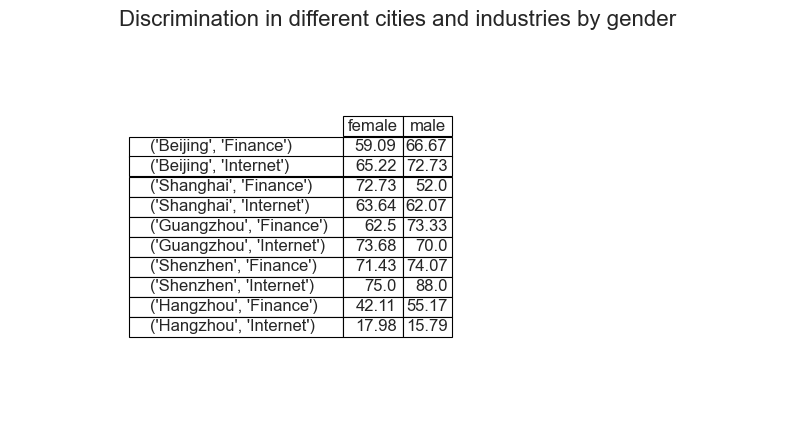

In [121]:
df5 = df5.round({'percentage': 2})

# Define the order of cities
city_order = ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Hangzhou']

# Convert 'co_city' column to Categorical type and specify order
df5['co_city'] = pd.Categorical(df5['co_city'], categories=city_order, ordered=True)

# Sort the data by city and industry
df5 = df5.sort_values(['co_city', 'industry'])

# Reshape the data into a pivot table
table_data = df5.pivot_table(index=['co_city', 'industry'], columns='gender', values='percentage')

# Create the table and plot it
fig, ax = plt.subplots(figsize=(10, 5))
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=table_data.index, loc='center')
table.auto_set_column_width(col=list(range(len(table_data.columns))))
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
ax.axis('off')
ax.set_title('Discrimination in different cities and industries by gender', fontsize=16)
plt.show()


/var/folders/rq/7vwg0mzj2cj2cfs257dfb4b00000gn/T/ipykernel_80809/60564071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ifdisc'] = df2['ifdisc'].fillna('No')
/var/folders/rq/7vwg0mzj2cj2cfs257dfb4b00000gn/T/ipykernel_80809/60564071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['disc_think'] = df2['disc_think'].fillna('Unsure')
/var/folders/rq/7vwg0mzj2cj2cfs257dfb4b00000gn/T/ipykernel_80809/60564071.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

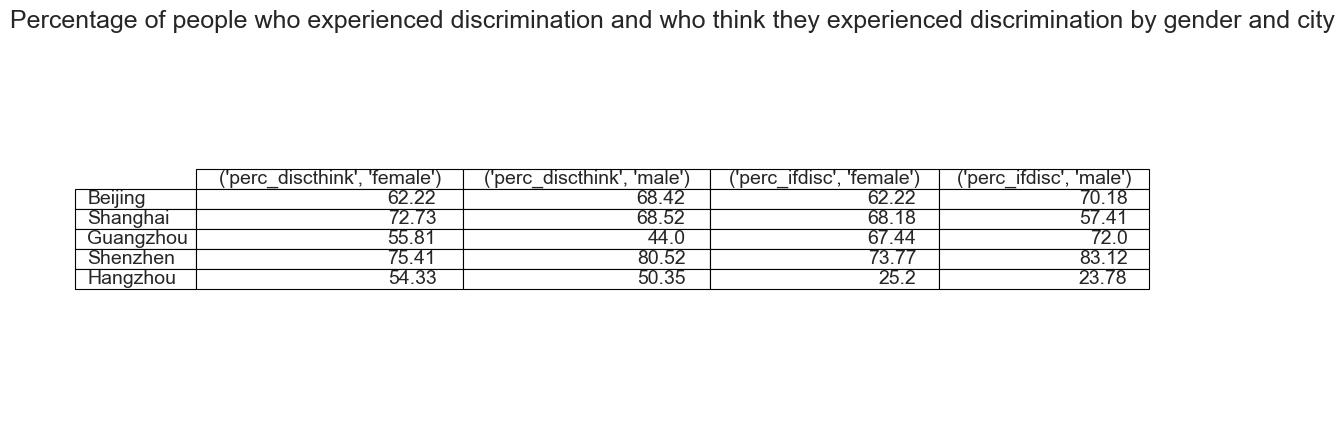

In [123]:
# Create a new dataframe with 'gender', 'co_city', 'ifdisc', and 'discthink' columns
df2 = df[['gender', 'co_city', 'ifdisc', 'disc_think']]

# Replace missing values with 'No' for 'ifdisc' and 'Unsure' for 'discthink'
df2['ifdisc'] = df2['ifdisc'].fillna('No')
df2['disc_think'] = df2['disc_think'].fillna('Unsure')

# Create a new column 'count' with value 1 for each row
df2['count'] = 1

# Calculate the total count of people by gender and city
df_total = df2.groupby(['co_city', 'gender'])['count'].sum().reset_index()

# Calculate the count of people who experienced discrimination by gender and city
df_ifdisc = df2[df2['ifdisc'] == 'Yes'].groupby(['co_city', 'gender'])['count'].sum().reset_index()

# Calculate the count of people who think they experienced discrimination by gender and city
df_discthink = df2[df2['disc_think'] == 'Yes'].groupby(['co_city', 'gender'])['count'].sum().reset_index()

# Merge the dataframes
df_merge = pd.merge(df_total, df_ifdisc, on=['co_city', 'gender'], how='outer', suffixes=('_total', '_ifdisc'))
df_merge = pd.merge(df_merge, df_discthink, on=['co_city', 'gender'], how='outer')

# Calculate the percentage of people who experienced discrimination and who think they experienced discrimination by gender and city
df_merge['perc_ifdisc'] = np.round(df_merge['count_ifdisc'] / df_merge['count_total'] * 100,2)
df_merge['perc_discthink'] = np.round(df_merge['count'] / df_merge['count_total'] * 100,2)

# Define the order of cities
city_order = ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Hangzhou']

# Convert 'co_city' column to Categorical type and specify order
df_merge['co_city'] = pd.Categorical(df_merge['co_city'], categories=city_order, ordered=True)

# Sort the data by city and gender
df_merge = df_merge.sort_values(['co_city', 'gender'])

# Reshape the data into a pivot table
table_data = df_merge.pivot_table(index=['co_city'], columns='gender', values=['perc_ifdisc', 'perc_discthink'])

# Create the table and plot it
fig, ax = plt.subplots(figsize=(10, 5))
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, rowLabels=table_data.index, loc='center')
table.auto_set_column_width(col=list(range(len(table_data.columns))))
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 1.2)
ax.axis('off')
ax.set_title('Percentage of people who experienced discrimination and who think they experienced discrimination by gender and city', fontsize=18)
plt.show()      


In [125]:
# group the data by gender and city
grouped = df.groupby(['gender', 'co_city'])

# define the categories of discrimination
disc_cats = ['Age', 'Health', 'Gender', 'Education']

# create an empty dictionary to store the results
results = {}

# iterate over each group
for name, group in grouped:
    # count the number of occurrences of each discrimination category
    counts = group['discthinktypes'].str.split(',').explode().str.strip().value_counts()
    # add the percentages to the results dictionary
    results[name] = counts

# create a dataframe from the results dictionary
results_df = pd.DataFrame(results)

# re-order the columns to match the order of the discrimination categories
results_df = results_df.reindex(disc_cats, axis=0)

# print the results
print(results_df)


                female                                               male   
               Beijing Guangzhou Hangzhou Other Shanghai Shenzhen Beijing   
discthinktypes                                                              
Age               13.0        12       55  16.0     18.0     16.0    20.0  \
Health             6.0         6       25   8.0     12.0     13.0     6.0   
Gender            24.0        17       56  15.0     28.0     41.0    29.0   
Education         20.0        18       50  11.0     24.0     37.0    31.0   

                                                           
               Guangzhou Hangzhou Other Shanghai Shenzhen  
discthinktypes                                             
Age                  5.0       58     7     16.0     24.0  
Health               1.0       35     5     12.0     20.0  
Gender               6.0       39     9     31.0     46.0  
Education           11.0       63     7     30.0     47.0  


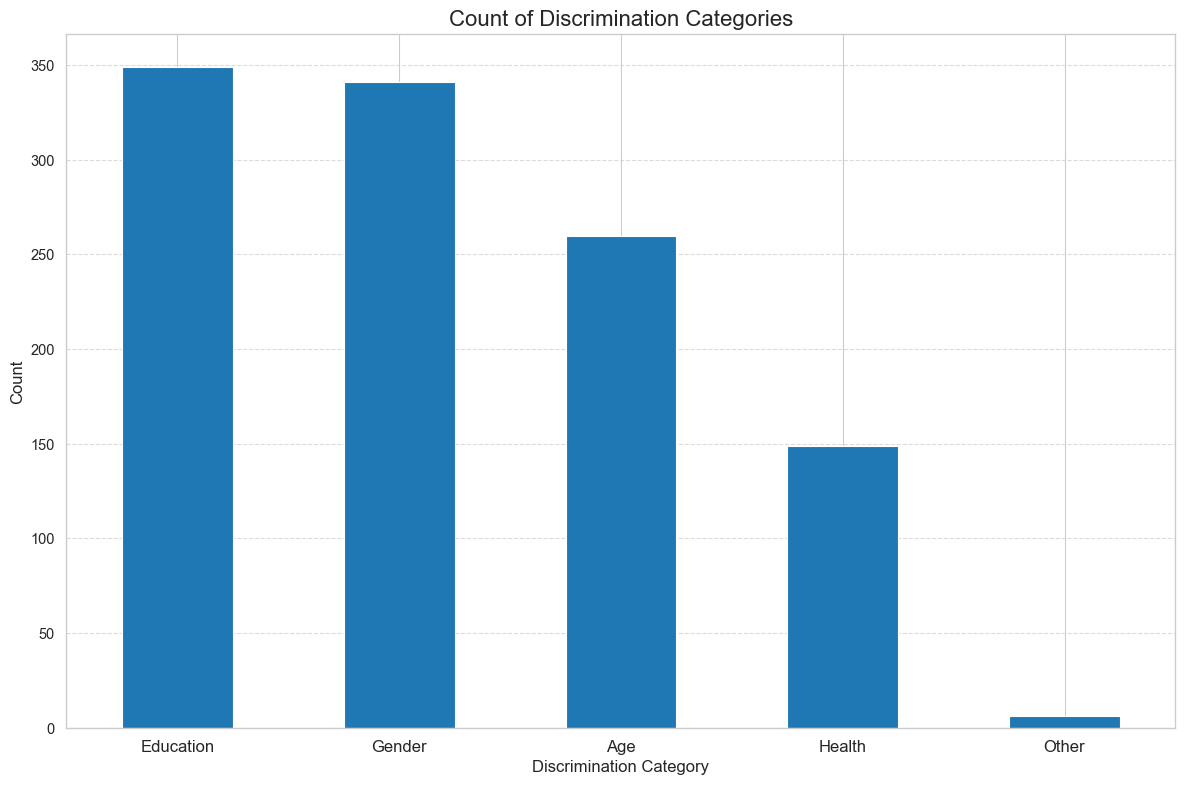

In [126]:
# count the number of occurrences of each discrimination category
counts = df['discthinktypes'].str.split(',').explode().str.strip().value_counts()

# create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
counts.plot(kind='bar', ax=ax)

# Add gridlines to the plot
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title to the plot
ax.set_xlabel('Discrimination Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Count of Discrimination Categories', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=12)

# Adjust the plot style
plt.tight_layout()

# Show the plot
plt.show()


In [128]:
# group the data by gender and city
grouped = df.groupby(['gender', 'co_city'])

# define the categories of discrimination
disc_cats = ['Age', 'Health', 'Gender', 'Education']

# create an empty dictionary to store the results
results = {}

# iterate over each group
for name, group in grouped:
    # count the number of occurrences of each discrimination category
    counts = group['discthinktypes'].str.split(',').explode().str.strip().value_counts()
    # calculate the percentages
    percentages = round(counts / counts.sum() * 100, 2)
    # format the percentages
    percentages = percentages.apply(lambda x: '{:.2f}%'.format(x))
    # add the percentages to the results dictionary
    results[name] = percentages

# create a dataframe from the results dictionary
results_df = pd.DataFrame(results).fillna('0.00%')

# re-order the columns to match the order of the discrimination categories
results_df = results_df.reindex(disc_cats, axis=0)

# print the results
print(results_df)


                female                                                 male   
               Beijing Guangzhou Hangzhou   Other Shanghai Shenzhen Beijing   
discthinktypes                                                                
Age             20.63%    22.22%   29.41%  32.00%   21.95%   14.95%  23.26%  \
Health           9.52%    11.11%   13.37%  16.00%   14.63%   12.15%   6.98%   
Gender          38.10%    31.48%   29.95%  30.00%   34.15%   38.32%  33.72%   
Education       31.75%    33.33%   26.74%  22.00%   29.27%   34.58%  36.05%   

                                                             
               Guangzhou Hangzhou   Other Shanghai Shenzhen  
discthinktypes                                               
Age               21.74%   29.29%  24.14%   17.98%   17.52%  
Health             4.35%   17.68%  17.24%   13.48%   14.60%  
Gender            26.09%   19.70%  31.03%   34.83%   33.58%  
Education         47.83%   31.82%  24.14%   33.71%   34.31%  


In [131]:
# group the data by gender and city
grouped = df.groupby('industry')

# define the categories of discrimination
disc_cats = ['Age', 'Health', 'Gender', 'Education']

# create an empty dictionary to store the results
results = {}

# iterate over each group
for name, group in grouped:
    # count the number of occurrences of each discrimination category
    counts = group['disctypesmeet'].str.split(',').explode().str.strip().value_counts()
    # calculate the percentages
    percentages = round(counts / counts.sum() * 100, 2)
    # format the percentages
    percentages = percentages.apply(lambda x: '{:.2f}%'.format(x))
    # add the percentages to the results dictionary
    results[name] = percentages

# create a dataframe from the results dictionary
results_df = pd.DataFrame(results).fillna('0.00%')

# re-order the columns to match the order of the discrimination categories
results_df = results_df.reindex(disc_cats, axis=0)

# print the results
print(results_df)


              Finance Internet
disctypesmeet                 
Age            27.78%   30.93%
Health         12.09%   10.40%
Gender         25.82%   27.20%
Education      33.99%   30.93%


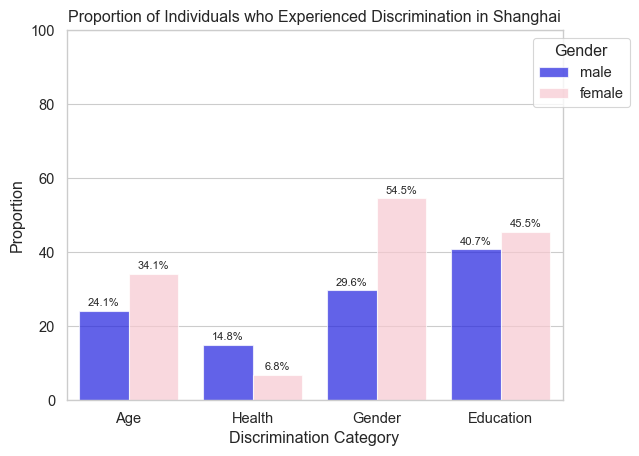

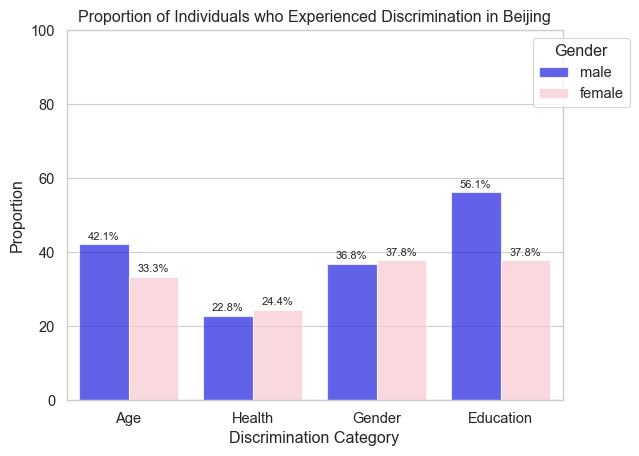

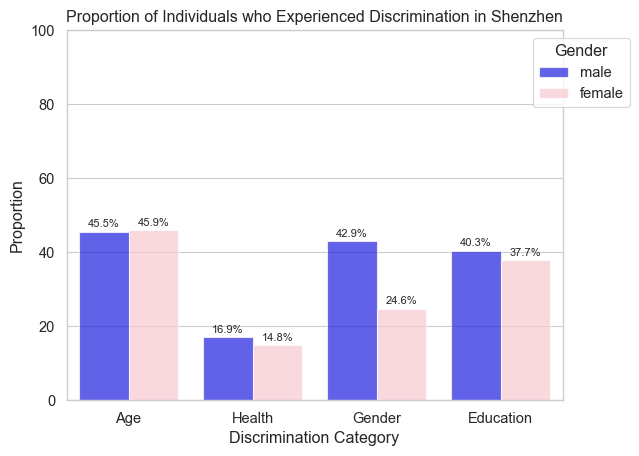

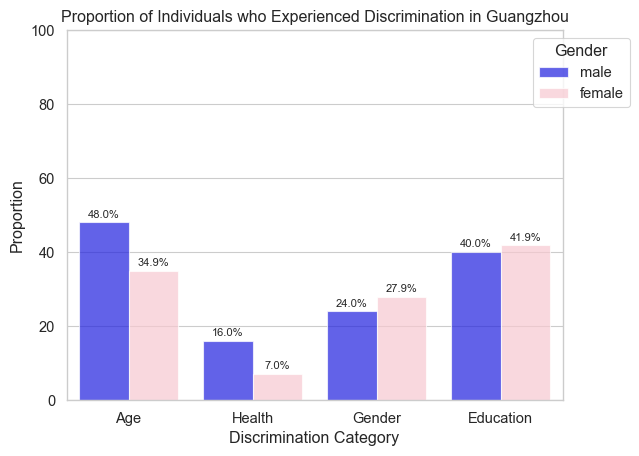

In [132]:
df = pd.read_csv('Questionnarie_Clean_Manually.csv')
disc_cats = ['Age', 'Health', 'Gender', 'Education']

city_disc_proportions = {'Shanghai': {'male': {}, 'female': {}},
                        'Beijing': {'male': {}, 'female': {}},
                        'Shenzhen': {'male': {}, 'female': {}},
                        'Guangzhou': {'male': {}, 'female': {}}}

for city in city_disc_proportions:
    for gender in ['male', 'female']:
        # Subset the data to only include individuals from the current city and gender
        city_gender_data = df[(df['co_city'] == city) & (df['gender'] == gender)]
    
        # Calculate the proportion of individuals who experienced discrimination based on each category
        for category in disc_cats:
            disc_count = city_gender_data[city_gender_data['DiscTypesMeet'].str.contains(category, na=False)].shape[0]
            total_count = city_gender_data.shape[0]
            proportion = round(disc_count / total_count *100,2) if total_count != 0 else 0 # Avoid division by zero
            city_disc_proportions[city][gender][category] = proportion

for city in city_disc_proportions:
    city_data = pd.DataFrame(city_disc_proportions[city])
    city_data = city_data.reset_index().melt(id_vars=['index'], var_name='gender', value_name='proportion')
    fig, ax = plt.subplots()
    sns.barplot(data=city_data, x='index', y='proportion', hue='gender', palette=['blue', 'pink'], alpha=0.7)
    ax.set_title(f"Proportion of Individuals who Experienced Discrimination in {city}")
    ax.set_xlabel("Discrimination Category")
    ax.set_ylabel("Proportion")
    ax.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.15, 1))
    ax.set_ylim(0, 100)
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues], fontsize=8, padding=2)

    plt.show()


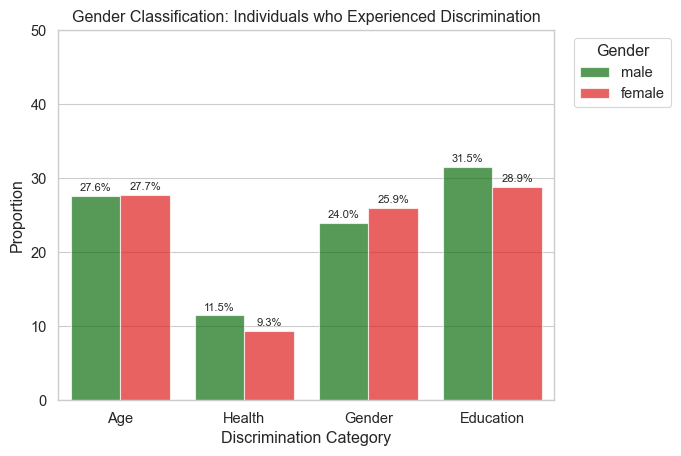

In [133]:
disc_cats = ['Age', 'Health', 'Gender', 'Education']

gender_disc_proportions = {'male': {}, 'female': {}}

for gender in gender_disc_proportions:
    # Subset the data to only include individuals of the current gender
    gender_data = df[df['gender'] == gender]
    
    # Calculate the proportion of individuals who experienced discrimination based on each category
    for category in disc_cats:
        disc_count = gender_data[gender_data['DiscTypesMeet'].str.contains(category, na=False)].shape[0]
        total_count = gender_data.shape[0]
        proportion = round(disc_count / total_count *100,2) if total_count != 0 else 0 # Avoid division by zero
        gender_disc_proportions[gender][category] = proportion

gender_data = pd.DataFrame(gender_disc_proportions)
gender_data = gender_data.reset_index().melt(id_vars=['index'], var_name='gender', value_name='proportion')
fig, ax = plt.subplots()
sns.barplot(data=gender_data, x='index', y='proportion', hue='gender', palette=['green', 'red'], alpha=0.7)
ax.set_title("Gender Classification: Individuals who Experienced Discrimination")
ax.set_xlabel("Discrimination Category")
ax.set_ylabel("Proportion")
ax.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.25, 1))
ax.set_ylim(0, 50)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues], fontsize=8, padding=2)

plt.show()


In [ ]:
# Create a contingency table of gender and discrimination category
gender_disc_table = pd.crosstab(df['gender'], df['DiscTypesMeet'])

# Create a contingency table of city and discrimination category
city_disc_table = pd.crosstab(df['co_city'], df['DiscTypesMeet'])

# Create a contingency table of city and discrimination category
indu_disc_table = pd.crosstab(df['Industry'], df['DiscTypesMeet'])

# Perform the chi-square test of independence for gender and discrimination category
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(gender_disc_table)

# Perform the chi-square test of independence for city and discrimination category
chi2_city, p_city, dof_city, expected_city = chi2_contingency(city_disc_table)

# Perform the chi-square test of independence for industry and discrimination category
chi2_indu, p_indu, dof_indu, expected_indu = chi2_contingency(indu_disc_table)


print('Gender and discrimination category:')
print(f'Chi-square statistic: {chi2_gender:.2f}')
print(f'P-value: {p_gender:.4f}')
print(f'Degrees of freedom: {dof_gender}')
print('')

print('City and discrimination category:')
print(f'Chi-square statistic: {chi2_city:.2f}')
print(f'P-value: {p_city:.4f}')
print(f'Degrees of freedom: {dof_city}')
print('')

print('Industry and discrimination category:')
print(f'Chi-square statistic: {chi2_indu:.2f}')
print(f'P-value: {p_indu:.4f}')
print(f'Degrees of freedom: {dof_indu}')


Gender and discrimination category:
Chi-square statistic: 9.49
P-value: 0.7988
Degrees of freedom: 14

City and discrimination category:
Chi-square statistic: 120.90
P-value: 0.0002
Degrees of freedom: 70

Industry and discrimination category:
Chi-square statistic: 9.00
P-value: 0.8310
Degrees of freedom: 14


In [ ]:
# Create a contingency table of gender and discrimination category
gender_disc_table = pd.crosstab(df['gender'], df['DiscThinkTypes'])

# Create a contingency table of city and discrimination category
city_disc_table = pd.crosstab(df['co_city'], df['DiscThinkTypes'])

# Perform the chi-square test of independence for gender and discrimination category
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(gender_disc_table)

# Perform the chi-square test of independence for city and discrimination category
chi2_city, p_city, dof_city, expected_city = chi2_contingency(city_disc_table)

print('Gender and discrimination category:')
print(f'Chi-square statistic: {chi2_gender:.2f}')
print(f'P-value: {p_gender:.4f}')
print(f'Degrees of freedom: {dof_gender}')
print('')

print('City and discrimination category:')
print(f'Chi-square statistic: {chi2_city:.2f}')
print(f'P-value: {p_city:.4f}')
print(f'Degrees of freedom: {dof_city}')


Gender and discrimination category:
Chi-square statistic: 47.24
P-value: 0.0005
Degrees of freedom: 20

City and discrimination category:
Chi-square statistic: 255.20
P-value: 0.0000
Degrees of freedom: 100


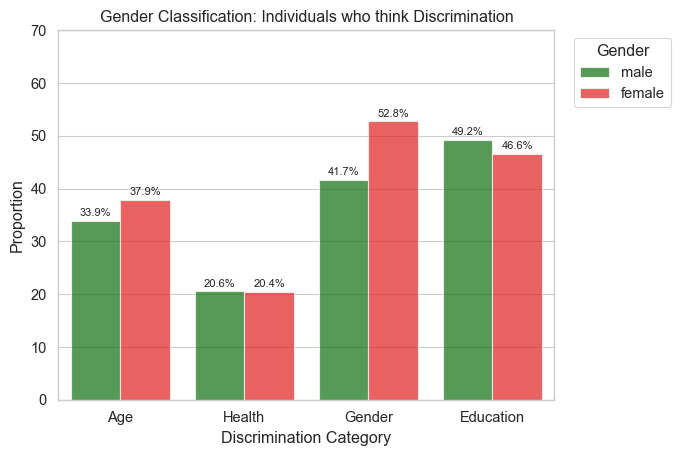

In [ ]:
disc_cats = ['Age', 'Health', 'Gender', 'Education']

gender_disc_proportions = {'male': {}, 'female': {}}

for gender in gender_disc_proportions:
    # Subset the data to only include individuals of the current gender
    gender_data = df[df['gender'] == gender]
    
    # Calculate the proportion of individuals who experienced discrimination based on each category
    for category in disc_cats:
        disc_count = gender_data[gender_data['DiscThinkTypes'].str.contains(category, na=False)].shape[0]
        total_count = gender_data.shape[0]
        proportion = round(disc_count / total_count *100,2) if total_count != 0 else 0 # Avoid division by zero
        gender_disc_proportions[gender][category] = proportion

gender_data = pd.DataFrame(gender_disc_proportions)
gender_data = gender_data.reset_index().melt(id_vars=['index'], var_name='gender', value_name='proportion')
fig, ax = plt.subplots()
sns.barplot(data=gender_data, x='index', y='proportion', hue='gender', palette=['green', 'red'], alpha=0.7)
ax.set_title("Gender Classification: Individuals who think Discrimination")
ax.set_xlabel("Discrimination Category")
ax.set_ylabel("Proportion")
ax.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.25, 1))
ax.set_ylim(0, 70)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues], fontsize=8, padding=2)

plt.show()


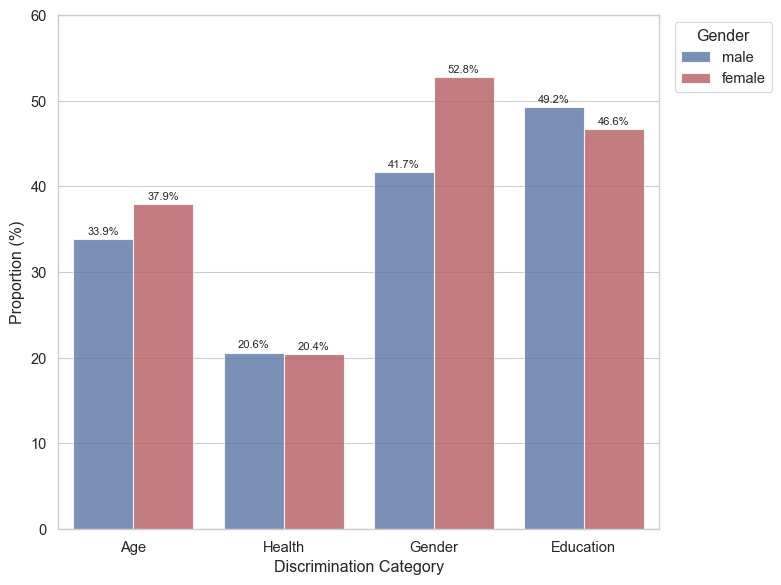

In [ ]:
# Define the discrimination categories
disc_cats = ['Age', 'Health', 'Gender', 'Education']

# Calculate the proportion of individuals who think they experienced discrimination based on each category and gender
gender_disc_proportions = {'male': {}, 'female': {}}
for gender in gender_disc_proportions:
    gender_data = df[df['gender'] == gender]
    for category in disc_cats:
        disc_count = gender_data[gender_data['DiscThinkTypes'].str.contains(category, na=False)].shape[0]
        total_count = gender_data.shape[0]
        proportion = round(disc_count / total_count * 100, 2) if total_count != 0 else 0
        gender_disc_proportions[gender][category] = proportion

# Create a dataframe with the proportion of individuals who think they experienced discrimination based on each category and gender
gender_data = pd.DataFrame(gender_disc_proportions)
gender_data = gender_data.reset_index().melt(id_vars=['index'], var_name='gender', value_name='proportion')

# Create the bar plot
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=gender_data, x='index', y='proportion', hue='gender', palette=['#4C72B0', '#C44E52'], alpha=0.8)

# Set the plot title, axis labels, and legend
# ax.set_title("Proportion of Individuals Who Think Discrimination by Category and Gender")
ax.set_xlabel("Discrimination Category")
ax.set_ylabel("Proportion (%)")
ax.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.2, 1))

# Set the y-axis limits and add labels to the bars
ax.set_ylim(0, 60)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues], fontsize=8, padding=2)

# Save the plot
plt.tight_layout()
plt.savefig("proportion_discrimination.png", dpi=300)


In [ ]:
print(gender_data)

       index  gender  proportion
0        Age    male       33.85
1     Health    male       20.57
2     Gender    male       41.67
3  Education    male       49.22
4        Age  female       37.90
5     Health  female       20.41
6     Gender  female       52.77
7  Education  female       46.65


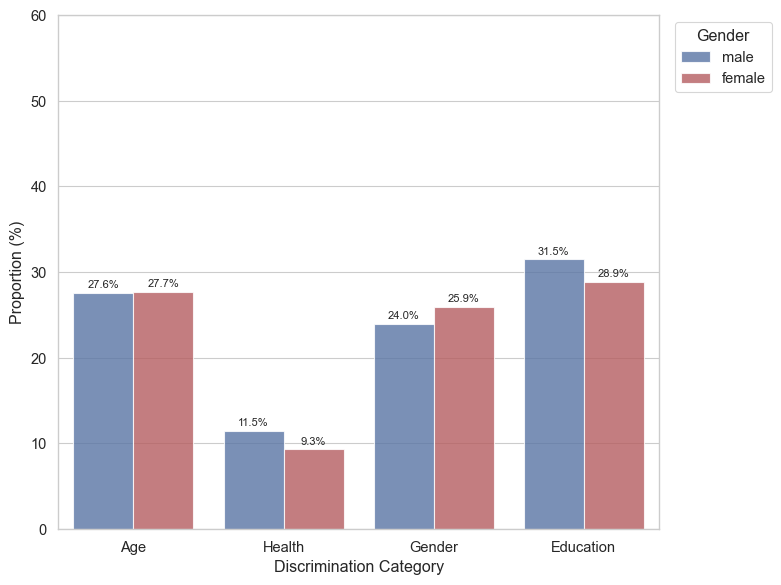

In [ ]:
# Define the discrimination categories
disc_cats = ['Age', 'Health', 'Gender', 'Education']

# Calculate the proportion of individuals who think they experienced discrimination based on each category and gender
gender_disc_proportions = {'male': {}, 'female': {}}
for gender in gender_disc_proportions:
    gender_data = df[df['gender'] == gender]
    for category in disc_cats:
        disc_count = gender_data[gender_data['DiscTypesMeet'].str.contains(category, na=False)].shape[0]
        total_count = gender_data.shape[0]
        proportion = round(disc_count / total_count * 100, 2) if total_count != 0 else 0
        gender_disc_proportions[gender][category] = proportion

# Create a dataframe with the proportion of individuals who think they experienced discrimination based on each category and gender
gender_data = pd.DataFrame(gender_disc_proportions)
gender_data = gender_data.reset_index().melt(id_vars=['index'], var_name='gender', value_name='proportion')

# Create the bar plot
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=gender_data, x='index', y='proportion', hue='gender', palette=['#4C72B0', '#C44E52'], alpha=0.8)

# Set the plot title, axis labels, and legend
# ax.set_title("Proportion of Individuals Who experienced Discrimination by Category and Gender")
ax.set_xlabel("Discrimination Category")
ax.set_ylabel("Proportion (%)")
ax.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.2, 1))

# Set the y-axis limits and add labels to the bars
ax.set_ylim(0, 60)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues], fontsize=8, padding=2)

# Save the plot
plt.tight_layout()
plt.savefig("proportion_discrimination.png", dpi=300)



In [ ]:
print(gender_data)

       index  gender  proportion
0        Age    male       27.60
1     Health    male       11.46
2     Gender    male       23.96
3  Education    male       31.51
4        Age  female       27.70
5     Health  female        9.33
6     Gender  female       25.95
7  Education  female       28.86


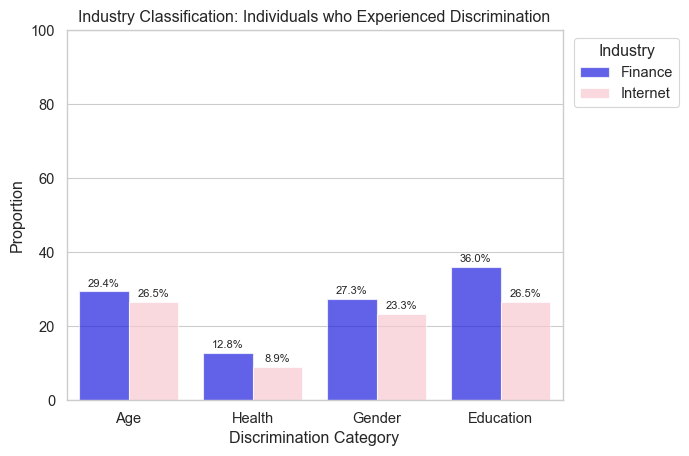

In [ ]:
disc_cats = ['Age', 'Health', 'Gender', 'Education']

industry_disc_proportions = {'Finance': {}, 'Internet': {}}

for industry in industry_disc_proportions:
    # Subset the data to only include individuals of the current industry
    industry_data = df[df['Industry'] == industry]
    
    # Calculate the proportion of individuals who experienced discrimination based on each category
    for category in disc_cats:
        disc_count = industry_data[industry_data['DiscTypesMeet'].str.contains(category, na=False)].shape[0]
        total_count = industry_data.shape[0]
        proportion = round(disc_count / total_count *100,2) if total_count != 0 else 0 # Avoid division by zero
        industry_disc_proportions[industry][category] = proportion

industry_data = pd.DataFrame(industry_disc_proportions)
industry_data = industry_data.reset_index().melt(id_vars=['index'], var_name='Industry', value_name='proportion')
fig, ax = plt.subplots()
sns.barplot(data=industry_data, x='index', y='proportion', hue='Industry', palette=['blue', 'pink'], alpha=0.7)
ax.set_title("Industry Classification: Individuals who Experienced Discrimination")
ax.set_xlabel("Discrimination Category")
ax.set_ylabel("Proportion")
ax.legend(title="Industry", loc='upper right', bbox_to_anchor=(1.25, 1))
ax.set_ylim(0, 100)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues], fontsize=8, padding=2)

plt.show()


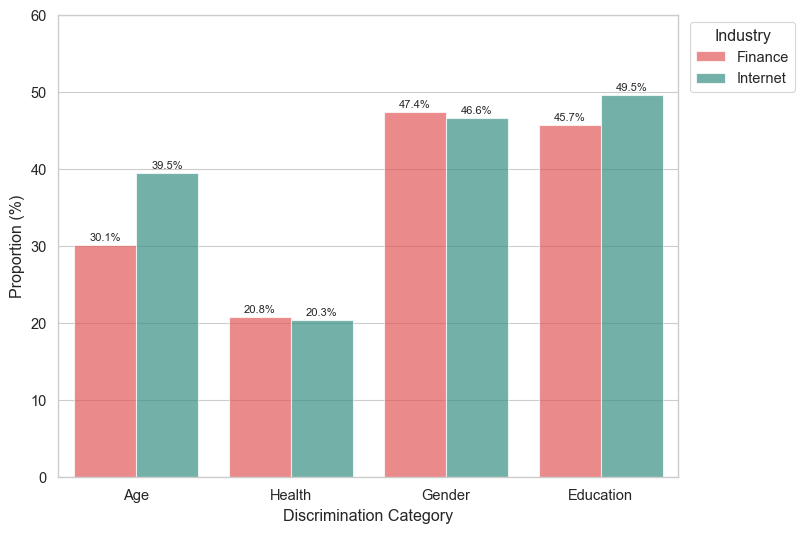

In [ ]:
disc_cats = ['Age', 'Health', 'Gender', 'Education']

industry_disc_proportions = {'Finance': {}, 'Internet': {}}

for industry in industry_disc_proportions:
    # Subset the data to only include individuals of the current industry
    industry_data = df[df['Industry'] == industry]
    
    # Calculate the proportion of individuals who experienced discrimination based on each category
    for category in disc_cats:
        disc_count = industry_data[industry_data['DiscThinkTypes'].str.contains(category, na=False)].shape[0]
        total_count = industry_data.shape[0]
        proportion = round(disc_count / total_count *100,2) if total_count != 0 else 0 # Avoid division by zero
        industry_disc_proportions[industry][category] = proportion

industry_data = pd.DataFrame(industry_disc_proportions)
industry_data = industry_data.reset_index().melt(id_vars=['index'], var_name='Industry', value_name='proportion')


# Create the bar plot
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=industry_data, x='index', y='proportion', hue='Industry', palette=['#F94144', '#2A9D8F'], alpha=0.7)

# Set the plot title, axis labels, and legend
# ax.set_title("Industry Classification: Individuals who think Discrimination"
ax.set_xlabel("Discrimination Category")
ax.set_ylabel("Proportion (%)")
ax.legend(title="Industry", loc='upper right', bbox_to_anchor=(1.2, 1))

# Set the y-axis limits and add labels to the bars
ax.set_ylim(0, 60)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues], fontsize=8, padding=2)

plt.show()


In [ ]:
print(industry_data)

       index  Industry  proportion
0        Age   Finance       30.10
1     Health   Finance       20.76
2     Gender   Finance       47.40
3  Education   Finance       45.67
4        Age  Internet       39.50
5     Health  Internet       20.32
6     Gender  Internet       46.58
7  Education  Internet       49.54


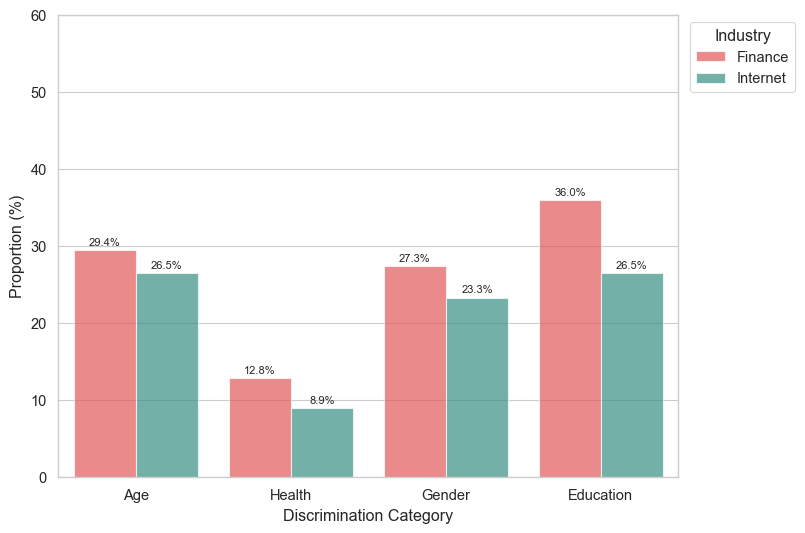

In [ ]:
disc_cats = ['Age', 'Health', 'Gender', 'Education']

industry_disc_proportions = {'Finance': {}, 'Internet': {}}

for industry in industry_disc_proportions:
    # Subset the data to only include individuals of the current industry
    industry_data = df[df['Industry'] == industry]
    
    # Calculate the proportion of individuals who experienced discrimination based on each category
    for category in disc_cats:
        disc_count = industry_data[industry_data['DiscTypesMeet'].str.contains(category, na=False)].shape[0]
        total_count = industry_data.shape[0]
        proportion = round(disc_count / total_count *100,2) if total_count != 0 else 0 # Avoid division by zero
        industry_disc_proportions[industry][category] = proportion

industry_data = pd.DataFrame(industry_disc_proportions)
industry_data = industry_data.reset_index().melt(id_vars=['index'], var_name='Industry', value_name='proportion')


# Create the bar plot
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=industry_data, x='index', y='proportion', hue='Industry', palette=['#F94144', '#2A9D8F'], alpha=0.7)

# Set the plot title, axis labels, and legend
# ax.set_title("Industry Classification: Individuals who think Discrimination"
ax.set_xlabel("Discrimination Category")
ax.set_ylabel("Proportion (%)")
ax.legend(title="Industry", loc='upper right', bbox_to_anchor=(1.2, 1))

# Set the y-axis limits and add labels to the bars
ax.set_ylim(0, 60)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues], fontsize=8, padding=2)

plt.show()


In [ ]:
print(industry_data)

       index  Industry  proportion
0        Age   Finance       29.41
1     Health   Finance       12.80
2     Gender   Finance       27.34
3  Education   Finance       35.99
4        Age  Internet       26.48
5     Health  Internet        8.90
6     Gender  Internet       23.29
7  Education  Internet       26.48


In [ ]:
df['ifdisc'] = df['ifdisc'].replace({"Yes": 1, "No": 0})

In [ ]:
print(df['ifdisc'].value_counts())

ifdisc
0    370
1    357
Name: count, dtype: int64


In [ ]:
print(df['gender'].value_counts())
print(df['ifdisc'].value_counts())
print(df['Industry'].value_counts())
print(df['co_city'].value_counts())

gender
male      384
female    343
Name: count, dtype: int64
ifdisc
0    370
1    357
Name: count, dtype: int64
Industry
Internet    438
Finance     289
Name: count, dtype: int64
co_city
Hangzhou     270
Shenzhen     138
Beijing      102
Shanghai      98
Guangzhou     68
Other         51
Name: count, dtype: int64


In [ ]:
print(df['Internet_type'].value_counts())

Internet_type
F    150
A     66
C     63
E     56
D     40
B     37
G     26
Name: count, dtype: int64


In [ ]:
# Create a contingency table of gender and discrimination category
gender_disc_table = pd.crosstab(df['Finance_type'], df['ifdisc'])

# Create a contingency table of city and discrimination category
city_disc_table = pd.crosstab(df['Internet_type'], df['ifdisc'])

# Perform the chi-square test of independence for gender and discrimination category
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(gender_disc_table)

# Perform the chi-square test of independence for city and discrimination category
chi2_city, p_city, dof_city, expected_city = chi2_contingency(city_disc_table)

print('Gender and discrimination category:')
print(f'Chi-square statistic: {chi2_gender:.2f}')
print(f'P-value: {p_gender:.4f}')
print(f'Degrees of freedom: {dof_gender}')
print('')

print('City and discrimination category:')
print(f'Chi-square statistic: {chi2_city:.2f}')
print(f'P-value: {p_city:.4f}')
print(f'Degrees of freedom: {dof_city}')


Gender and discrimination category:
Chi-square statistic: 24.10
P-value: 0.0000
Degrees of freedom: 3

City and discrimination category:
Chi-square statistic: 81.25
P-value: 0.0000
Degrees of freedom: 6


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(index=df['co_city'], columns=df['ifdisc'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 173.70881732208824
p-value: 1.1793419606133378e-35


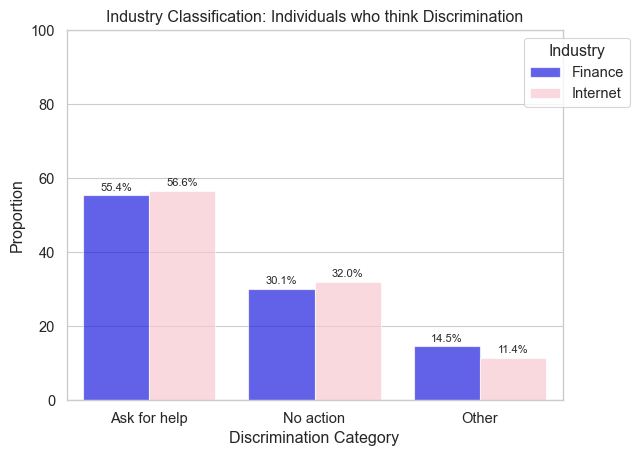

In [ ]:
disc_cats = ['Ask for help', 'No action','Other']

industry_disc_proportions = {'Finance': {}, 'Internet': {}}

for industry in industry_disc_proportions:
    # Subset the data to only include individuals of the current industry
    industry_data = df[df['Industry'] == industry]
    
    # Calculate the proportion of individuals who experienced discrimination based on each category
    for category in disc_cats:
        disc_count = industry_data[industry_data['resType'].str.contains(category, na=False)].shape[0]
        total_count = industry_data.shape[0]
        proportion = round(disc_count / total_count *100,2) if total_count != 0 else 0 # Avoid division by zero
        industry_disc_proportions[industry][category] = proportion

industry_data = pd.DataFrame(industry_disc_proportions)
industry_data = industry_data.reset_index().melt(id_vars=['index'], var_name='Industry', value_name='proportion')
fig, ax = plt.subplots()
sns.barplot(data=industry_data, x='index', y='proportion', hue='Industry', palette=['blue', 'pink'], alpha=0.7)
ax.set_title("Industry Classification: Individuals who think Discrimination")
ax.set_xlabel("Discrimination Category")
ax.set_ylabel("Proportion")
ax.legend(title="Industry", loc='upper right', bbox_to_anchor=(1.15, 1))
ax.set_ylim(0, 100)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{val:.1f}%' for val in i.datavalues], fontsize=8, padding=2)

plt.show()
